In [23]:
#This is basically a machine learning model to predict the weather conditions in seattle based on input values.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


data = pd.read_csv("C:/Users/yahqu/Downloads/seattle-weather.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [24]:
#drop unneccessary colums
data = data.drop("date", axis=1)

In [25]:
#Print the first 5 rows of data
print(data.head())

   precipitation  temp_max  temp_min  wind  weather
0            0.0      12.8       5.0   4.7  drizzle
1           10.9      10.6       2.8   4.5     rain
2            0.8      11.7       7.2   2.3     rain
3           20.3      12.2       5.6   4.7     rain
4            1.3       8.9       2.8   6.1     rain


# Replace Other weather groups such as drizzle and co to just 'other' since they have very little amount of data

In [26]:
data = data.replace(to_replace=['fog','drizzle','snow'],value='other')
data = data[data['weather'] != 'other']
print(data.head())

   precipitation  temp_max  temp_min  wind weather
1           10.9      10.6       2.8   4.5    rain
2            0.8      11.7       7.2   2.3    rain
3           20.3      12.2       5.6   4.7    rain
4            1.3       8.9       2.8   6.1    rain
5            2.5       4.4       2.2   2.2    rain


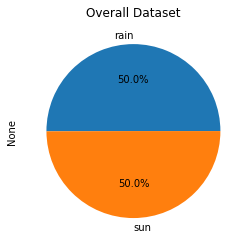

In [27]:
#Plot the original data as a pie chart to visualize the count of weather grouped values. 
groups = data.groupby('weather').size().plot(kind='pie', autopct='%1.1f%%', title = 'Overall Dataset')

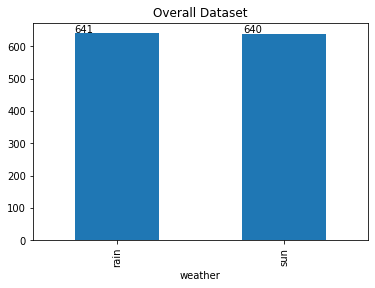

In [28]:
#Plot a bar chart to visualize the count of weather grouped values. 
groups = data.groupby('weather').size().plot(kind='bar', title = 'Overall Dataset')
for p in groups.patches:
    groups.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Split the dataset into Training And Testing 

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('weather', axis = 1), data['weather'], test_size= 0.20)

# Visualizing the test dataframe to know what we are testing our model's performance with..

In [30]:
#Merege both frames
test_dataframe_to_visulaize = pd.concat([X_test, Y_test], axis=1)
test_dataframe_to_visulaize

,precipitation,temp_max,temp_min,wind,weather
1305,0.0,32.2,14.4,3.8,sun
787,0.0,13.9,5.6,2.5,sun
738,9.7,10.0,7.2,4.6,rain
1349,0.0,27.2,15.0,3.1,sun
505,0.0,19.4,9.4,1.8,sun
...,...,...,...,...,...
779,15.2,8.9,5.0,6.2,rain
332,2.8,9.4,2.2,2.9,rain
124,1.8,12.2,6.1,4.6,rain
211,0.0,19.4,13.3,3.0,sun


<AxesSubplot: title={'center': 'Test Data'}, ylabel='None'>

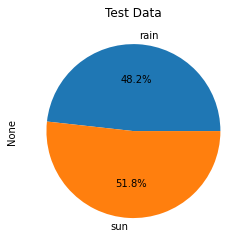

In [31]:
#graph the frame to know what values are being predicted correctly once model gets created.
test_dataframe_to_visulaize.groupby('weather').size().plot(kind='pie', autopct='%1.1f%%', title = "Test Data")

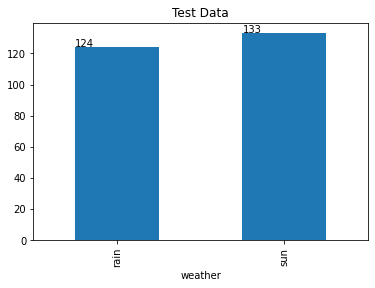

In [32]:
test_data = test_dataframe_to_visulaize.groupby('weather').size().plot(kind='bar', title = "Test Data")
for p in test_data.patches:
    test_data.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Now build the Model and train it

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train,Y_train)

LogisticRegression()

In [35]:
Predicted_weather = model.predict(X_test)

# Get models accuracy and visualize how much were correctly predicted. and a confusion matrix

In [36]:
combine_Xtest_with_predicted_weater = pd.concat([X_test.reset_index(), pd.DataFrame(Predicted_weather, columns = ['Predicted weather'])], axis = 1)

In [37]:
combine_Xtest_with_predicted_weater

,index,precipitation,temp_max,temp_min,wind,Predicted weather
0,1305,0.0,32.2,14.4,3.8,sun
1,787,0.0,13.9,5.6,2.5,sun
2,738,9.7,10.0,7.2,4.6,rain
3,1349,0.0,27.2,15.0,3.1,sun
4,505,0.0,19.4,9.4,1.8,sun
...,...,...,...,...,...,...
252,779,15.2,8.9,5.0,6.2,rain
253,332,2.8,9.4,2.2,2.9,rain
254,124,1.8,12.2,6.1,4.6,rain
255,211,0.0,19.4,13.3,3.0,sun


In [38]:
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
models_accuracy = accuracy_score(Y_test, Predicted_weather)
Precision_Score = precision_score(y_true = encoder1.fit_transform(Y_test), y_pred= encoder2.fit_transform(Predicted_weather),average='macro')
print("The models accuracy is:", models_accuracy)
print("The models Precision_Score is:", Precision_Score)

The models accuracy is: 0.9455252918287937
The models Precision_Score is: 0.9523809523809523


<AxesSubplot: title={'center': 'Predicted data values'}, ylabel='None'>

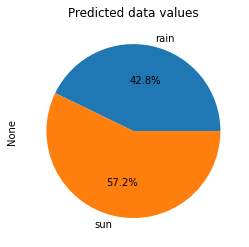

In [39]:
combine_Xtest_with_predicted_weater.groupby('Predicted weather').size().plot(kind='pie', autopct='%1.1f%%', title = "Predicted data values")

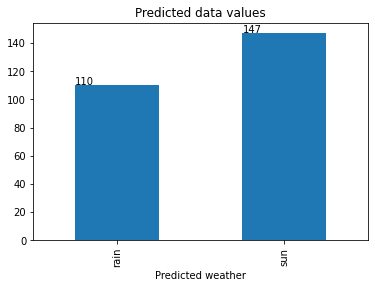

In [40]:
combined_data = combine_Xtest_with_predicted_weater.groupby('Predicted weather').size().plot(kind='bar', title = 'Predicted data values')
for p in combined_data.patches:
    combined_data.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

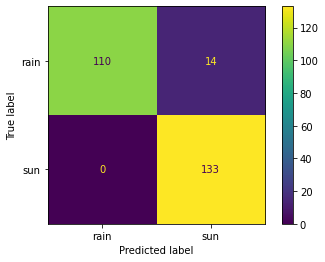

In [41]:
cm = confusion_matrix( Y_test, Predicted_weather, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Write results to excel.

In [42]:
Final_results = pd.concat([combine_Xtest_with_predicted_weater.reset_index(),Y_test.reset_index()], axis = 1)

In [43]:
Final_results

,level_0,index,precipitation,temp_max,temp_min,wind,Predicted weather,index,weather
0,0,1305,0.0,32.2,14.4,3.8,sun,1305,sun
1,1,787,0.0,13.9,5.6,2.5,sun,787,sun
2,2,738,9.7,10.0,7.2,4.6,rain,738,rain
3,3,1349,0.0,27.2,15.0,3.1,sun,1349,sun
4,4,505,0.0,19.4,9.4,1.8,sun,505,sun
...,...,...,...,...,...,...,...,...,...
252,252,779,15.2,8.9,5.0,6.2,rain,779,rain
253,253,332,2.8,9.4,2.2,2.9,rain,332,rain
254,254,124,1.8,12.2,6.1,4.6,rain,124,rain
255,255,211,0.0,19.4,13.3,3.0,sun,211,sun


In [44]:
Final_results.to_excel("Machine_learning_Decision_tree.xlsx")